## Observations and Insights 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
df_inner = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')
#rename columns
df_inner.columns = ['mouse_ID', 'drug', 'sex', 'age', 'weight', 'day_tested', 'tumor_vol', 'sites' ] 
display(df_inner.columns)
df_inner

Index(['mouse_ID', 'drug', 'sex', 'age', 'weight', 'day_tested', 'tumor_vol',
       'sites'],
      dtype='object')

,mouse_ID,drug,sex,age,weight,day_tested,tumor_vol,sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice.
number_mice = len(df_inner.mouse_ID.unique())
number_mice

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_df = df_inner[['mouse_ID','day_tested']]
dupe_df
dupe_df.index
dupe_df.sort_values(by='mouse_ID')
dupe_df = dupe_df.sort_values(["mouse_ID", "day_tested"], ascending = (True, True))
print(dupe_df.head(1))
dupe_df.nunique() #number of unique items in df

    mouse_ID  day_tested
454     a203           0


mouse_ID      249
day_tested     10
dtype: int64

In [11]:
# Optional: Get all the data for the duplicate mouse ID. ?
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

#ref
#mouse_ID  drug 	sex	  age   	weight  	day_tested  	tumor_vol   	sites
#k403	   Ramicane	Male  21	     16	         0	          45.000000       	0

#sample:You call .groupby() and pass the name of the column you want to group on, 
#which is "col name". Then, you use ["col name"] to specify the columns on which you want to perform the actual aggregation.
#n_by_state = df.groupby("state")["last_name"].count()

#gives the drugs and number of rows per drug / count of days of results / 
drug_mean = df_inner.groupby("drug", sort=True).mean()["tumor_vol"]
drug_sum = df_inner.groupby("drug", sort=True).sum()["tumor_vol"]
drug_var = df_inner.groupby("drug", sort=True).var()["tumor_vol"]
drug_std = df_inner.groupby("drug", sort=True).std()["tumor_vol"]
drug_sem = df_inner.groupby("drug", sort=True).sem()["tumor_vol"]

summary_dict = {"tumor_vol_mean":drug_mean, "tumor_vol_median":drug_sum,"tumor_vol_var":drug_var,
                "tumor_vol_stddev":drug_std,"tumor_vol_sem":drug_sem}

sum_vol=pd.DataFrame(summary_dict)
display(sum_vol)


,tumor_vol_mean,tumor_vol_median,tumor_vol_var,tumor_vol_stddev,tumor_vol_sem
drug,,,,,
Capomulin,40.675741,9355.420462,24.947764,4.994774,0.329346
Ceftamin,52.591172,9361.228582,39.290177,6.268188,0.469821
Infubinol,52.884795,9413.493529,43.128684,6.567243,0.492236
Ketapril,55.235638,10384.299876,68.553577,8.279709,0.603860
Naftisol,54.331565,10105.671026,66.173479,8.134708,0.596466
Placebo,54.033581,9780.078122,61.168083,7.821003,0.581331
Propriva,52.322552,8423.930878,42.351070,6.507770,0.512884
Ramicane,40.216745,9169.417875,23.486704,4.846308,0.320955
Stelasyn,54.233149,9816.199991,59.450562,7.710419,0.573111


## Bar and Pie Charts
#sample code:
#df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
#plt.show()
#df.plot(kind='bar',x='name',y='age')

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: drug, dtype: int64


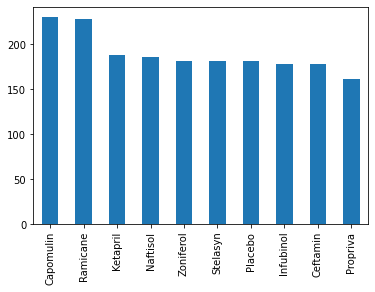

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_counts= df_inner['drug'].value_counts()
#print (drug_counts)
drug_counts.plot(kind='bar')

<BarContainer object of 10 artists>

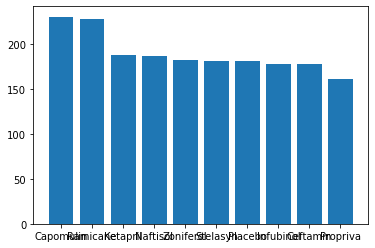

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(drug_counts.index.values, drug_counts.values)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas




Male      958
Female    935
Name: sex, dtype: int64


([<matplotlib.patches.Wedge at 0x210340273c8>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')])

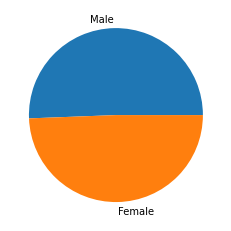

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
sex_counts= df_inner['sex'].value_counts()
print (sex_counts)
labels=["Male", "Female"]

plt.pie(sex_counts.values, labels=labels)

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_tumor_mouse = df_inner.groupby ("mouse_ID", sort=True).max()["day_tested"]
display(max_tumor_mouse)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


mouse_ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: day_tested, Length: 249, dtype: int64

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
